# Libraries

In [1]:
from pathlib import Path
import numpy as np

from src.visualization import EDAPlotter

# Data Prep

In [2]:
train_path = Path("./data/raw/aug_train.csv")

# Read first line as header
with open(train_path, "r", encoding="utf-8") as f:
    train_header = f.readline().strip().split(",")

train_data = np.genfromtxt(train_path, delimiter=",", skip_header=1, dtype=str)

In [3]:
test_path = Path("./data/raw/aug_test.csv")

# Read first line as header
with open(test_path, "r", encoding="utf-8") as f:
    test_header = f.readline().strip().split(",")

test_data = np.genfromtxt(test_path, delimiter=",", skip_header=1, dtype=str)

In [4]:
# Display first 5 rows
train_data[:5]

array([['8949', 'city_103', '0.92', 'Male', 'Has relevent experience',
        'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', '36',
        '1.0'],
       ['29725', 'city_40', '0.7759999999999999', 'Male',
        'No relevent experience', 'no_enrollment', 'Graduate', 'STEM',
        '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'],
       ['11561', 'city_21', '0.624', '', 'No relevent experience',
        'Full time course', 'Graduate', 'STEM', '5', '', '', 'never',
        '83', '0.0'],
       ['33241', 'city_115', '0.789', '', 'No relevent experience', '',
        'Graduate', 'Business Degree', '<1', '', 'Pvt Ltd', 'never',
        '52', '1.0'],
       ['666', 'city_162', '0.767', 'Male', 'Has relevent experience',
        'no_enrollment', 'Masters', 'STEM', '>20', '50-99',
        'Funded Startup', '4', '8', '0.0']], dtype='<U23')

# EDA

## Overall

What is the target column?

In [5]:
set(train_header) - set(test_header)

{'target'}

How long is the training set? How long is the test set?

In [6]:
print(len(train_data))
print(len(test_data))

19158
2129


Which features are numerical/categorical?

In [7]:
print("Feature names:", train_header)
print("Sample:", train_data[6])

Feature names: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']
Sample: ['28806' 'city_160' '0.92' 'Male' 'Has relevent experience'
 'no_enrollment' 'High School' '' '5' '50-99' 'Funded Startup' '1' '24'
 '0.0']


Almost features are categorical. Maybe *training_hours*, *city_development_index* is numerical.

Let check unique values in each feature.

In [8]:
for i, feature in enumerate(train_header):
    unique_values = set(train_data[:, i])
    print(
        f"Feature '{feature}' has {len(unique_values)} unique values: {unique_values}"
    )

Feature 'enrollee_id' has 19158 unique values: {'20298', '28923', '17467', '29798', '22827', '24332', '31719', '5423', '28477', '17893', '9647', '32368', '26248', '15994', '18561', '20015', '20149', '13697', '22833', '9086', '5711', '9995', '5856', '29017', '23642', '14498', '14513', '7688', '28738', '27748', '1212', '4374', '5598', '27663', '5502', '27409', '20145', '8899', '16402', '31860', '32463', '3755', '14693', '9513', '20704', '28803', '24743', '18993', '18984', '27037', '32276', '13376', '17064', '20727', '7739', '31736', '7340', '27045', '32127', '11457', '6561', '29534', '13325', '20421', '3370', '18040', '1063', '7695', '4156', '9869', '898', '19738', '758', '29162', '19427', '124', '13084', '24853', '22609', '15252', '12133', '32261', '15656', '6844', '24602', '7676', '29773', '14656', '17483', '28875', '4840', '19063', '33156', '3248', '12433', '13820', '30017', '9613', '15616', '32925', '32700', '10791', '32223', '22146', '4822', '10771', '26705', '17861', '2169', '4577'

How many missing values are there in each feature?

In [9]:
for i, feature in enumerate(train_header):
    missing_count = np.sum(train_data[:, i] == "")
    print(f"Feature '{feature}' has {missing_count} missing values. Percentage: {missing_count / len(train_data) * 100:.2f}%")

Feature 'enrollee_id' has 0 missing values. Percentage: 0.00%
Feature 'city' has 0 missing values. Percentage: 0.00%
Feature 'city_development_index' has 0 missing values. Percentage: 0.00%
Feature 'gender' has 4508 missing values. Percentage: 23.53%
Feature 'relevent_experience' has 0 missing values. Percentage: 0.00%
Feature 'enrolled_university' has 386 missing values. Percentage: 2.01%
Feature 'education_level' has 460 missing values. Percentage: 2.40%
Feature 'major_discipline' has 2813 missing values. Percentage: 14.68%
Feature 'experience' has 65 missing values. Percentage: 0.34%
Feature 'company_size' has 5938 missing values. Percentage: 30.99%
Feature 'company_type' has 6140 missing values. Percentage: 32.05%
Feature 'last_new_job' has 423 missing values. Percentage: 2.21%
Feature 'training_hours' has 0 missing values. Percentage: 0.00%
Feature 'target' has 0 missing values. Percentage: 0.00%


## Plotting

Is the data balanced?

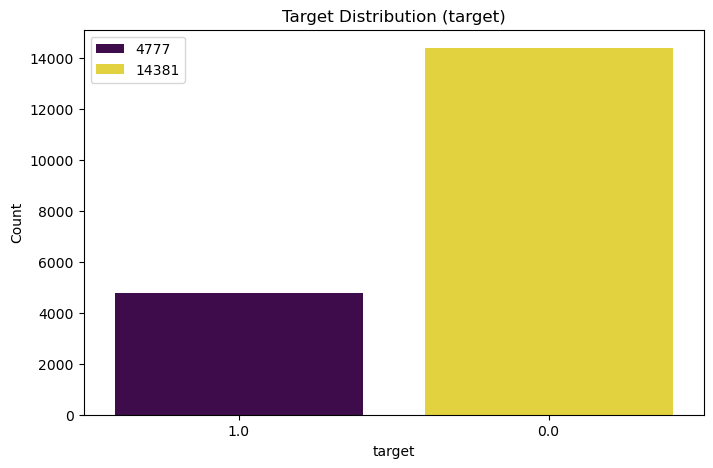

In [10]:
EDAPlotter.plot_target_distribution(train_data[:, -1], "target")

How the numerical features distributed with respect to the target variable?

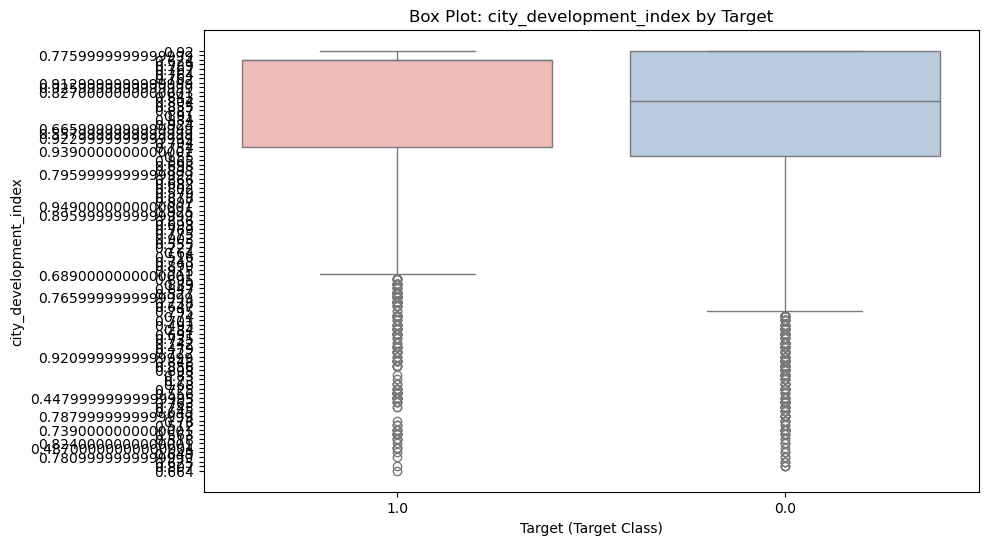

In [11]:
EDAPlotter.plot_numerical_vs_target(
    num_data=train_data[:, train_header.index("city_development_index")],
    target_data=train_data[:, train_header.index("target")],
    num_col_name="city_development_index",
)

Check violinplot

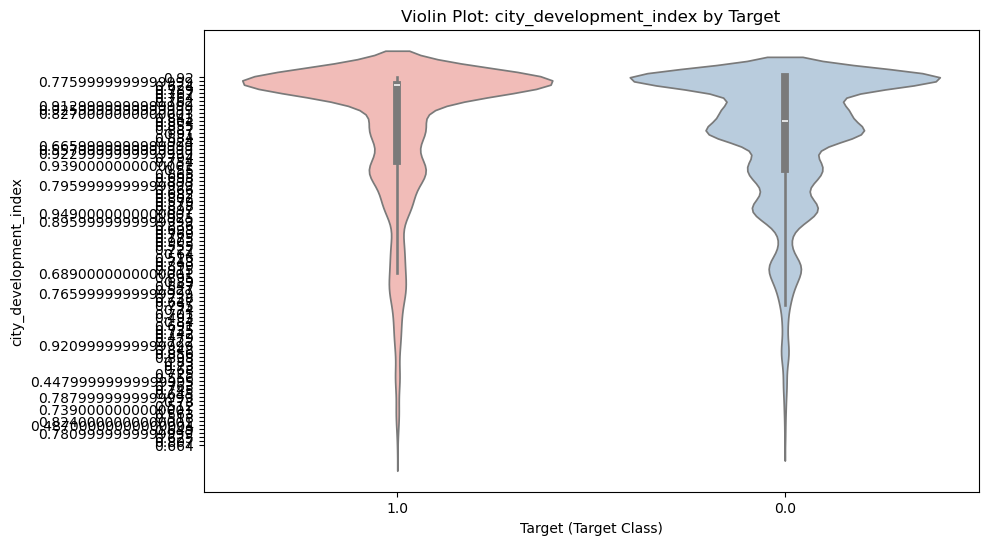

In [12]:
EDAPlotter.plot_numerical_vs_target(
    num_data=train_data[:, train_header.index("city_development_index")],
    target_data=train_data[:, train_header.index("target")],
    num_col_name="city_development_index",
    plot_type="violin"
)

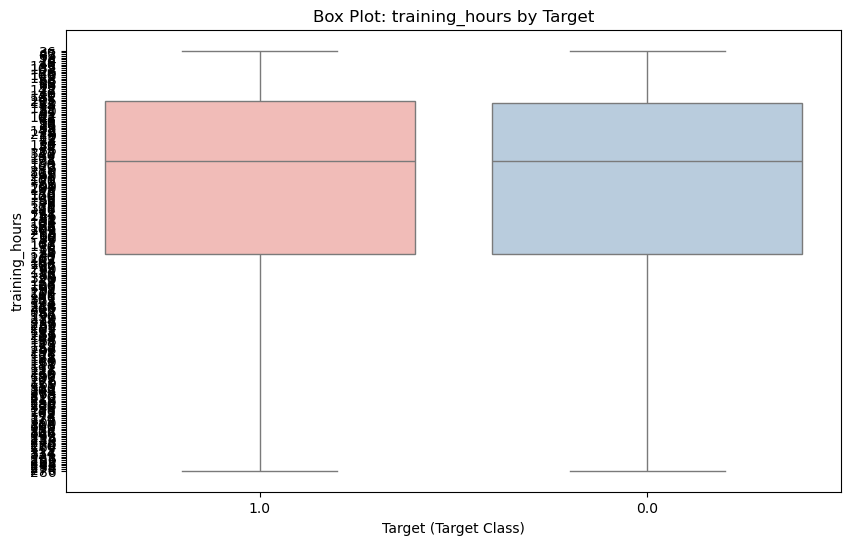

In [13]:
EDAPlotter.plot_numerical_vs_target(
    num_data=train_data[:, train_header.index("training_hours")],
    target_data=train_data[:, train_header.index("target")],
    num_col_name="training_hours",
)

How the categorical features distributed with respect to the target variable?

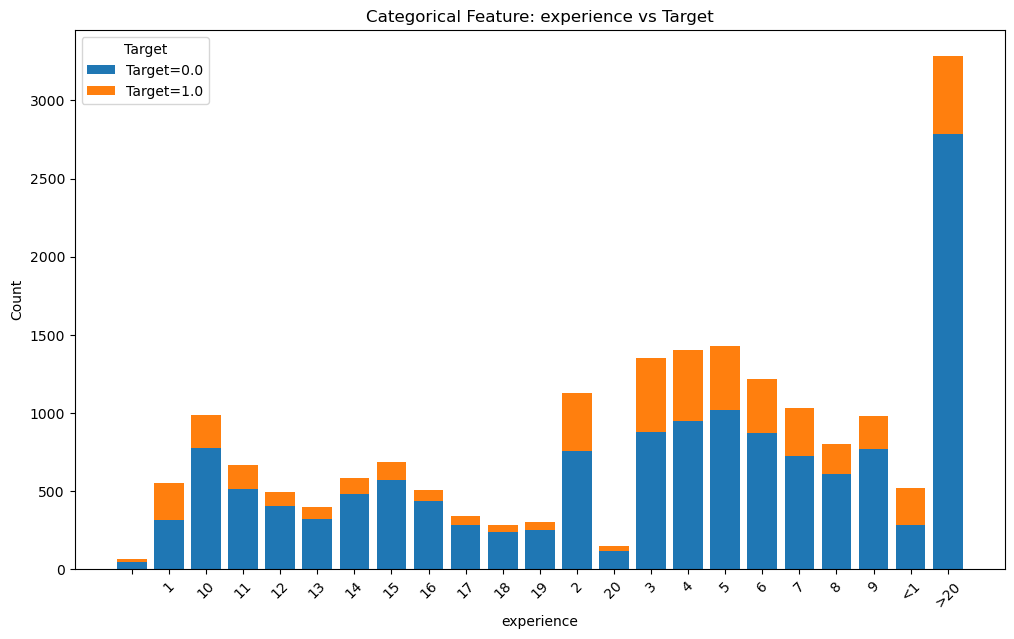

In [14]:
EDAPlotter.plot_categorical_vs_target(
    cat_data=train_data[:, train_header.index("experience")],
    target_data=train_data[:, train_header.index("target")],
    cat_col_name="experience",
)

More expericence, higher chance to look for a job change.

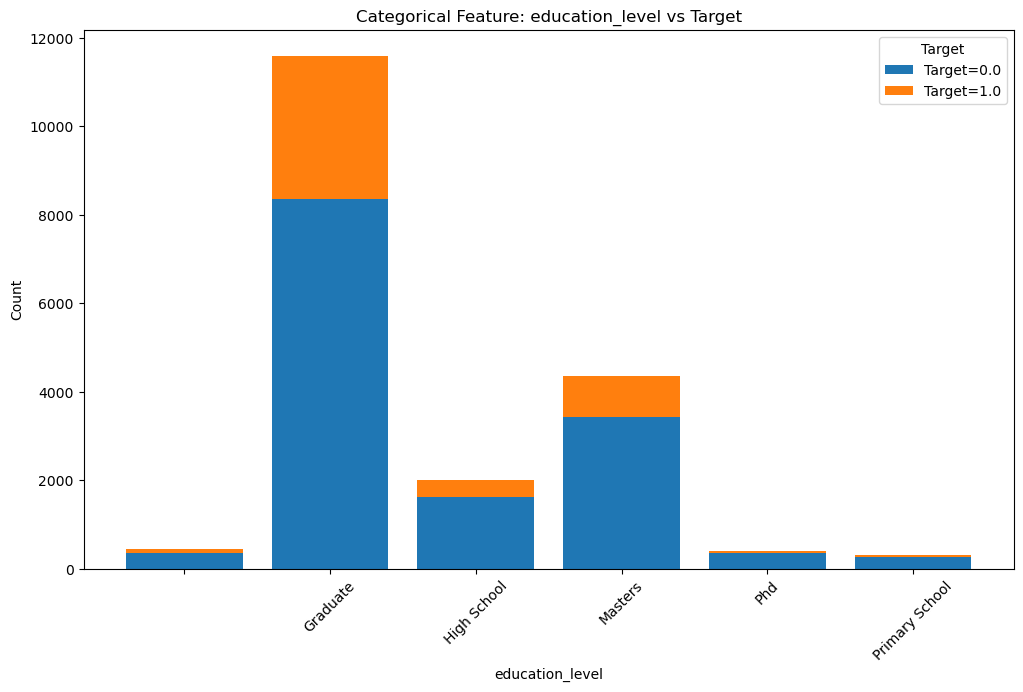

In [15]:
EDAPlotter.plot_categorical_vs_target(
    cat_data=train_data[:, train_header.index("education_level")],
    target_data=train_data[:, train_header.index("target")],
    cat_col_name="education_level",
)

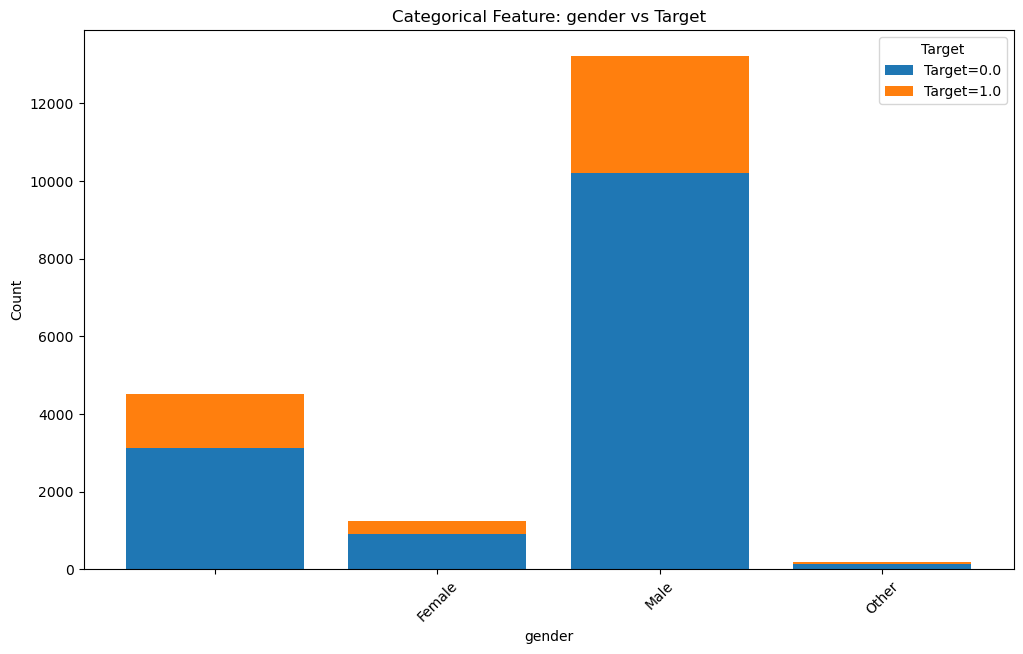

In [16]:
EDAPlotter.plot_categorical_vs_target(
    cat_data=train_data[:, train_header.index("gender")],
    target_data=train_data[:, train_header.index("target")],
    cat_col_name="gender",
)

Maybe Male Data Scientist are more likely to look for a job change?

# Conclusion

Because only categorical features have missing values, imputation strategies for missing values are:
- For *gender*, *company_size*, *company_type* (>20% missing): treat missing as a separate category.
- Others: impute with mode 